# Travaux pratiques 1 

## Année: 2024-2025

## Objectifs
1. Renforcer les concepts à l'aide d'outils comme NumPy et scikit-learn.
2. Appliquer la logique propositionnelle et la tester sur des ensembles de données d'images.
3. Explorer la logique prédicative et la valider sur des ensembles de données d'images.
4. Comprendre les techniques d'analyse de texte, y compris le stemming, la lemmatisation et l'analyse morphologique.

### Exercice 1.0 [★]

Testez le notebook Python Jupyter [rappels](./TP0.ipynb) et familiarisez-vous avec les différentes méthodes des bibliothèques : numpy, scikit-learn, etc.

### Exercice 1.1 [★]

L'exercice consiste à tester la logique propositionnelle. Le fichier CSV (`image_data.csv`) contient des attributs tels que la couleur, la forme, la taille, la texture et la classification après le processus d'analyse d'image. Définissez les propositions ci-dessous et testez les expressions logiques basées sur ces attributs pour évaluer les relations au sein des données.

##### Étape 1 : Charger et Inspecter le Fichier CSV
1. Lire le fichier CSV dans un DataFrame pandas.
2. Afficher les premières lignes du DataFrame pour comprendre la structure.

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('./data/image_data.csv')

# Inspect the data
print(df.head())

    color      shape  size    texture classification
0   green   triangle   400  polka dot         animal
1     red     square   150  patterned          plant
2   green     square   250  polka dot         object
3  yellow  rectangle   200  polka dot       building
4     red     circle   200  polka dot        vehicle


#### Étape 2 : Définir des Propositions Basées sur les Données
1. Créer des propositions booléennes basées sur les colonnes du fichier CSV.
   - `P` : Vérifie si la couleur est bleue.
   - `Q` : Vérifie si la forme est un cercle.
   - `R` : Vérifie si la classification est un animal.
   - `S` : Vérifie si la taille est grande (définir un seuil pour 'grand').
   - `T` : Vérifie si la texture est rugueuse.
   - `U` : Vérifie si la classification est un véhicule.
   - `V` : Vérifie si la classification est un bâtiment.

In [2]:
P = df['color'] == "blue"
Q = df['shape'] == "circle"
R = df['classification'] == "animal"
S = df['size'] > 300
T = df['texture'] == "rough"
U = df['classification'] == "vehicle"
V = df['classification'] == "building"

df['P'] = P
df['Q'] = Q
df['R'] = R
df['S'] = S
df['T'] = T
df['U'] = U
df['V'] = V

print(df[['color', 'shape', 'size', 'texture', 'classification', 'P', 'Q', 'R', 'S', 'T', 'U', 'V']].head(10))

    color      shape  size    texture classification      P      Q      R  \
0   green   triangle   400  polka dot         animal  False  False   True   
1     red     square   150  patterned          plant  False  False  False   
2   green     square   250  polka dot         object  False  False  False   
3  yellow  rectangle   200  polka dot       building  False  False  False   
4     red     circle   200  polka dot        vehicle  False   True  False   
5   green     square   200  patterned         object  False  False  False   
6    blue     circle   400  polka dot          plant   True   True  False   
7  purple    ellipse   250     smooth         object  False  False  False   
8    blue    ellipse   300      rough         animal   True  False   True   
9     red     square   200  polka dot         animal  False  False   True   

       S      T      U      V  
0   True  False  False  False  
1  False  False  False  False  
2  False  False  False  False  
3  False  False  False  

#### Étape 3 : Définir les Expressions Logiques
Créer des expressions logiques basées sur les propositions définies à l'étape 2.
   - `expr1` : Si la couleur est bleue et la forme est un cercle, alors la classification est un animal.
   - `expr2` : Si la taille est grande et la texture est rugueuse, alors la classification est un véhicule.
   - `expr3` : Si la classification est un bâtiment, que la forme est un cercle, que la couleur est bleue et que la taille est grande, alors la classification est un bâtiment.

In [3]:
expr1 = ~(P & Q) | R
expr2 = ~(S & T) | U
expr3 = ~(V & Q & P & S) | V

df['expr1'] = expr1
df['expr2'] = expr2
df['expr3'] = expr3


#### Étape 4 : Tester les Expressions
1. Tester les expressions logiques sur chaque ligne du DataFrame.
2. Afficher les résultats des expressions pour chaque ligne.

In [4]:
print(df[['color', 'shape', 'size', 'texture', 'classification', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'expr1', 'expr2', 'expr3']])

     color      shape  size    texture classification      P      Q      R  \
0    green   triangle   400  polka dot         animal  False  False   True   
1      red     square   150  patterned          plant  False  False  False   
2    green     square   250  polka dot         object  False  False  False   
3   yellow  rectangle   200  polka dot       building  False  False  False   
4      red     circle   200  polka dot        vehicle  False   True  False   
..     ...        ...   ...        ...            ...    ...    ...    ...   
95  yellow     circle   250      rough          plant  False   True  False   
96  yellow   triangle   350  patterned       building  False  False  False   
97  yellow  rectangle   100  patterned         animal  False  False   True   
98  yellow     circle   150      rough         object  False   True  False   
99  purple     square   350    striped          plant  False  False  False   

        S      T      U      V  expr1  expr2  expr3  
0    True

##### Étape 5 : Ajouter une Proposition Composée avec Négation et Disjonction

Créer une nouvelle expression complexe qui teste ce qui suit :
- Si l'objet n'est **pas bleu** ou **a une texture lisse**, alors il est classé comme **non un objet**.

In [5]:
W = df['texture'] == "smooth"
X = df['classification'] == "object"
expr4 = ~(~P | W) | ~X

df['expr4'] = expr4

##### Étape 6 : Compter les Lignes Satisfaisantes pour Chaque Expression

Compter le nombre de lignes où chaque expression logique est `True` et comparer les fréquences des propositions satisfaites.

In [7]:
counts = {
    'expr1_count': df['expr1'].sum(),
    'expr2_count': df['expr2'].sum(),
    'expr3_count': df['expr3'].sum(),
    'expr4_count': df['expr4'].sum()
}

print("Nombre de lignes satisfaisantes pour chaque expression :")
print(counts)

Nombre de lignes satisfaisantes pour chaque expression :
{'expr1_count': np.int64(99), 'expr2_count': np.int64(97), 'expr3_count': np.int64(100), 'expr4_count': np.int64(85)}


### Exercice 1.2 [★]

##### Étape 1 : Installer et Importer Z3
- Installer la bibliothèque de solveur Z3 (`z3-solver`).
- Importer Z3 et se familiariser avec ses fonctions de base.

In [43]:
!pip install z3-solver

In [8]:
from z3 import *

##### Étape 2 : Définir les Attributs comme Variables de Logique du Premier Ordre
- Définir des variables pour chaque colonne (par exemple, `color`, `shape`, `size`).
- Spécifier les valeurs possibles (par exemple, `color` peut être bleu, rouge, vert, etc.).
- Définir des contraintes pour des attributs tels que **size** étant un entier et d'autres attributs étant des chaînes de caractères.

In [10]:
# Declare Z3 variables
Color = String('color')
Shape = String('shape')
Size = Int('size')
Texture = String('texture')
Classification = String('classification')


# Define constraints
valid_colors = Or(Color == "blue", Color == "red", Color == "green", Color == "yellow", Color == "purple")
valid_shapes = Or(Shape == "circle", Shape == "square", Shape == "triangle", Shape == "rectangle", Shape == "ellipse")
valid_size = Size >= 100  # Size constraint
valid_textures = Or(Texture == "polka dot", Texture == "smooth", Texture == "patterned", Texture == "rough")
valid_classifications = Or(Classification == "animal", Classification == "plant", Classification == "object", Classification == "vehicle", Classification == "building")


#### Étape 3 : Encoder les Propositions Logiques en Logique du Premier Ordre
- Encoder les propositions fournies en utilisant la logique de Z3 (voir l'exercice 1.1).
- Exemple : Si l'objet est bleu et circulaire, alors il est classé comme un animal (`Implies(And(Color == "blue", Shape == "circle"), Classification == "animal")`).

In [11]:
# Add these constraints to the solver
solver = Solver()
solver.add(valid_colors, valid_shapes, valid_size, valid_textures, valid_classifications)

solver.add(Implies(And(Color == "blue", Shape == "circle"), Classification == "animal"))
solver.add(Implies(And(Size >= 300, Texture == "rough"), Classification == "vehicle"))
solver.add(Implies(And(Classification == "building", Shape == "circle", Color == "blue", Size >= 300), Classification == "building"))
solver.add(Implies(Or(Color != "blue", Texture == "smooth"), Classification != "object"))


##### Étape 4 : Résoudre pour la Satisfaisabilité

- Utiliser le solveur Z3 pour vérifier si les propositions sont satisfaisables.
- Afficher les résultats.

In [13]:
if solver.check() == sat:
    print("Les propositions sont satisfaisables.")
    model = solver.model()
    print("Voici une solution satisfaisante :")
    for d in model.decls():
        print(f"{d.name()} = {model[d]}")
else:
    print("Les propositions ne sont pas satisfaisables.")

Les propositions sont satisfaisables.
Voici une solution satisfaisante :
texture = "polka dot"
classification = "animal"
shape = "circle"
color = "blue"
size = 100


##### Étape 5 : Ajouter des Contraintes Supplémentaires
- Ajouter une contrainte qui restreint certaines combinaisons, comme « si l'objet est vert, il ne peut pas être circulaire ».
- Ajouter une autre contrainte où « les objets à pois ne peuvent pas être des véhicules ».

In [14]:
solver.add(Implies(Color == "green", Shape != "circle"))
solver.add(Implies(Texture == "polka dot", Classification != "vehicle"))

## Exercice 1.3 [★★]

Lire le fichier CSV `image_data.csv` et définir les attributs comme des variables Z3 en fonction des données du fichier. Encoder les propositions logiques et les contraintes en utilisant la logique du premier ordre pour chaque ligne, puis résoudre pour la satisfaisabilité.

In [15]:
import pandas as pd
from z3 import *

# Load CSV data
df = pd.read_csv('./data/image_data.csv')

# Initialize Z3 solver
solver = Solver()

##### Étape 2 : Définir les Variables Z3 Dynamiquement à Partir des Données CSV
Pour chaque ligne du CSV, définir les attributs comme des variables Z3 et s'assurer que les types sont cohérents.

In [16]:
# Define Z3 variables for each attribute dynamically for each row
for index, row in df.iterrows():
    color = String(f'color_{index}')
    shape = String(f'shape_{index}')
    size = Int(f'size_{index}')
    texture = String(f'texture_{index}')
    classification = String(f'classification_{index}')
    
    # Add constraints for valid values
    solver.add(Or(color == row['color'], shape == row['shape'], size == row['size'], texture == row['texture'], classification == row['classification']))


#### Étape 3 : Encoder des Propositions en Logique du Premier Ordre
- Écrire des propositions logiques pour chaque ligne, comme « si un objet est bleu et circulaire, alors il est classé comme un animal ».
- Utiliser l'exercice 1.1 et ajouter des propositions supplémentaires.

In [17]:
# Example FOL for each row
for index, row in df.iterrows():
    expr1 = Implies(And(String(f'color_{index}') == "blue", String(f'shape_{index}') == "circle"), String(f'classification_{index}') == "animal")
    solver.add(expr1)
    expr2 = Implies(And(Int(f"size_{index}") >= 300, String(f"texture_{index}") == "rough"), String(f"classification_{index}") == "vehicle")
    solver.add(expr2)
    expr3 = Implies(And(String(f"classification_{index}") == "building", String(f"shape_{index}") == "circle", String(f"color_{index}") == "blue", Int(f"size_{index}") >= 300), String(f"classification_{index}") == "building")
    solver.add(expr3)
    expr4 = Implies(Or(String(f"color_{index}") != "blue", String(f"texture_{index}") == "smooth"), String(f"classification_{index}") != "object")
    solver.add(expr4)


#### Étape 4 : Résoudre pour la Satisfaisabilité
Vérifier si les propositions logiques pour les données CSV sont satisfaisables.

In [18]:
def check_sat():
    if solver.check() == sat:
        print("Les propositions sont satisfaisables.")
        model = solver.model()
        print("Modèle trouvé :")
        for d in model.decls():
            print(f"{d.name()} = {model[d]}")
    else:
        print("Les propositions ne sont pas satisfaisables.")

check_sat()

Les propositions sont satisfaisables.
Modèle trouvé :
size_89 = 150
texture_97 = ""
color_12 = ""
color_44 = ""
color_88 = "yellow"
texture_61 = ""
color_51 = ""
texture_23 = ""
size_55 = 100
shape_83 = "rectangle"
texture_99 = ""
size_58 = 250
texture_51 = ""
classification_51 = ""
size_88 = 0
classification_18 = "vehicle"
classification_83 = ""
color_40 = ""
texture_84 = ""
size_21 = 0
color_23 = "green"
texture_68 = ""
texture_45 = ""
color_92 = ""
texture_74 = ""
color_32 = ""
texture_9 = ""
size_26 = 450
color_39 = "green"
shape_18 = ""
classification_41 = ""
classification_92 = ""
texture_42 = ""
size_62 = 0
size_94 = 100
texture_82 = ""
classification_67 = ""
size_7 = 250
classification_1 = ""
texture_95 = ""
classification_20 = ""
texture_57 = ""
color_93 = ""
classification_4 = ""
shape_36 = ""
shape_58 = ""
classification_59 = ""
shape_31 = ""
classification_16 = ""
size_25 = 0
color_66 = ""
classification_33 = ""
texture_15 = "smooth"
color_3 = ""
classification_34 = ""
shap

#### Étape 5 : Ajouter des Contraintes Supplémentaires
- Inclure de nouvelles contraintes (par exemple, « les objets verts ne peuvent pas être circulaires ») et vérifier à nouveau le résultat.

In [19]:
no_green_circle = Implies(String(f'color_{index}') == "green", String(f'shape_{index}') != "circle")
solver.add(no_green_circle)

In [20]:
check_sat()

Les propositions sont satisfaisables.
Modèle trouvé :
size_89 = 150
texture_97 = ""
color_12 = ""
color_44 = "yellow"
color_88 = "yellow"
texture_61 = ""
color_51 = ""
texture_23 = ""
size_55 = 100
shape_83 = ""
texture_99 = ""
size_58 = 250
texture_51 = ""
classification_51 = ""
size_88 = 0
classification_18 = "vehicle"
classification_83 = ""
color_40 = ""
texture_84 = "!4!"
size_21 = 400
color_23 = ""
texture_68 = ""
texture_45 = ""
texture_74 = ""
color_32 = ""
color_92 = ""
texture_9 = ""
size_26 = 0
color_39 = ""
shape_18 = ""
classification_41 = ""
classification_92 = ""
texture_42 = ""
size_62 = 0
size_94 = 100
texture_82 = ""
classification_67 = ""
size_72 = 0
size_7 = 250
classification_1 = ""
texture_95 = ""
classification_20 = ""
texture_57 = ""
color_93 = ""
classification_4 = ""
shape_36 = ""
shape_58 = ""
classification_59 = ""
shape_31 = ""
classification_16 = ""
size_25 = 0
color_66 = ""
classification_33 = ""
texture_15 = "smooth"
color_3 = ""
classification_34 = ""
sh

#### Étape 6 : Introduire une Contrainte Insatisfaisable
- Ajouter une contrainte conflictuelle qui force un objet à avoir deux attributs mutuellement exclusifs (par exemple, être à la fois bleu et rouge).
- Vérifier la satisfaisabilité et montrer que le modèle devient insatisfaisable.

In [21]:
# Add a conflicting constraint: Object must be both blue and red (which is impossible)
for index in range(len(df)):
    conflicting_constraint = And(String(f'color_{index}') == "blue", String(f'color_{index}') == "red")
    solver.add(conflicting_constraint)

# Check satisfiability after adding the conflicting constraint
if solver.check() == sat:
    print("The propositions are still satisfiable.")
else:
    print("The model is now unsatisfiable due to conflicting constraints.")


The model is now unsatisfiable due to conflicting constraints.


### Exercice 1.4 [★★]

Téléchargez cette page Web de Wikipedia : [https://fr.wikipedia.org/wiki/Paris](https://fr.wikipedia.org/wiki/Paris) et enregistrez le fichier au format HTML. Analysez la page Wikipedia en extrayant et en comptant les mots, les liens, les images, les nombres, les dates, les noms propres et les données structurées à partir des tableaux, tout en différenciant les sections et les paragraphes. Cela implique de télécharger le HTML, de le parser et d'identifier systématiquement le contenu pertinent. Écrivez un programme pour mettre en œuvre ces tâches :

1. **Télécharger le HTML** : Récupérer et enregistrer la page Wikipedia au format HTML.
2. **Charger le Contenu** : Lire et parser le fichier HTML pour analyse.
3. **Analyse des Mots** : Compter les occurrences de mots dans le texte.
4. **Extraction des Liens** : Identifier et catégoriser les liens internes et externes.
5. **Extraction d'Images** : Localiser les images et rassembler leurs URL et tailles.
6. **Extraction de Nombres et de Dates** : Identifier les nombres, les dates et les coordonnées géographiques.
7. **Noms Propres** : Extraire les noms de personnes et de lieux.
8. **Données des Tableaux** : Localiser et extraire les données des tableaux.
9. **Différenciation des Sections** : Identifier les sections et les paragraphes dans le contenu.

#### Analyse de la Page Wikipedia : Paris

Dans ce notebook, des tâches seront effectuées pour extraire et analyser divers éléments de la page Wikipedia de Paris.

##### Étape 1 : Télécharger la Page HTML
Tout d'abord, téléchargez le contenu HTML de la page Wikipedia spécifiée et enregistrez-le en tant que fichier HTML. Nous utilisons la bibliothèque `requests` pour gérer la requête HTTP. N'oubliez pas de vérifier le statut de la réponse pour confirmer que la page a été téléchargée avec succès.

In [22]:
!pip install requests

In [25]:
import requests

# URL of the Wikipedia page
url = "https://fr.wikipedia.org/wiki/Paris"

# Send a GET request to the URL
response = requests.get(url)

if response.status_code == 200:
    with open("paris.html", "w", encoding='utf-8') as file:
        file.write(response.text)
    print("Page HTML téléchargée et enregistrée sous paris.html")
else:
    print(f"Erreur lors du téléchargement de la page. Code de statut : {response.status_code}")


Page HTML téléchargée et enregistrée sous paris.html


##### Étape 2 : Charger le Contenu HTML
Chargez le fichier HTML téléchargé pour une analyse plus approfondie.
- **Commentaire** : Parser le HTML est crucial pour extraire des données. Assurez-vous d'utiliser une bibliothèque comme BeautifulSoup qui peut naviguer efficacement dans la structure HTML.

Familiarisez-vous avec les méthodes de `BeautifulSoup` pour trouver des éléments dans le HTML, telles que `find()` et `find_all()`.

In [30]:
!pip install beautifulsoup4

In [31]:
from bs4 import BeautifulSoup

# Load the HTML file
with open("paris.html", "r", encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")
print("HTML content loaded.")


HTML content loaded.


##### Étape 3 : Extraire et Analyser les Mots
Comptez les occurrences de chaque mot sur la page.
- **Commentaire** : Envisagez de normaliser le texte en le convertissant en minuscules pour éviter de compter le même mot en différentes majuscules séparément. Nous utilisons des expressions régulières pour filtrer efficacement les caractères non alphanumériques lors de la séparation du texte en mots.

In [32]:
from collections import Counter
import re

# Extract text from the HTML content
text = soup.get_text()

# Clean and split text into words
words = re.findall(r'\w+', text.lower())
word_count = Counter(words)

# Display the 10 most common words
print(word_count.most_common(10))


[('de', 3523), ('la', 2128), ('le', 1517), ('et', 1326), ('paris', 1215), ('l', 1045), ('des', 946), ('à', 924), ('en', 922), ('les', 830)]


##### Étape 4 : Extraire les Liens
Identifiez tous les liens internes et externes de la page.

- **Commentaire** : Comprendre la différence entre les liens internes et externes est important pour la catégorisation.
- **Indice** : Vérifiez l'attribut `href` des balises d'ancrage (`<a>`) pour déterminer le type de lien.

In [34]:
links = soup.find_all('a', href=True)

internal_links = []
external_links = []

for link in links:
    href = link['href']
    if href.startswith('/wiki/'):  # Internal links
        internal_links.append(href)
    elif href.startswith('http') or href.startswith('https'):  # External links
        external_links.append(href)

print(f"Number of internal links: {len(internal_links)}")
print(f"Number of external links: {len(external_links)}")


Number of internal links: 5063
Number of external links: 837


##### Étape 5 : Extraire les Images et Leurs Tailles
Identifiez toutes les images sur la page et obtenez leurs tailles.

- **Commentaire** : Soyez conscient que les images ne sont pas toujours stockées dans le même format. Assurez-vous de construire les bonnes URLs pour elles.
- **Indice** : Vous devrez peut-être vérifier les attributs des balises `<img>` pour obtenir des informations supplémentaires, telles que la taille des images si disponible.

In [35]:
images = soup.find_all('img')

image_data = []

for img in images:
    src = img.get('src')
    width = img.get('width')
    height = img.get('height')
    
    if src.startswith('//'):
        src = f"https:{src}"
    elif src.startswith('/'):
        src = f"https://fr.wikipedia.org{src}"
    
    image_data.append({
        'src': src,
        'width': width,
        'height': height
    })

print(f"Number of images found: {len(image_data)}")
print("Sample images with details:", image_data[:5])


Number of images found: 508
Sample images with details: [{'src': 'https://fr.wikipedia.org/static/images/icons/wikipedia.png', 'width': '50', 'height': '50'}, {'src': 'https://fr.wikipedia.org/static/images/mobile/copyright/wikipedia-wordmark-fr.svg', 'width': None, 'height': None}, {'src': 'https://fr.wikipedia.org/static/images/mobile/copyright/wikipedia-tagline-fr.svg', 'width': '120', 'height': '13'}, {'src': 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Long-semi-protection-shackle-frwiki.svg/15px-Long-semi-protection-shackle-frwiki.svg.png', 'width': '15', 'height': '21'}, {'src': 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Move-protection-shackle-frwiki.svg/15px-Move-protection-shackle-frwiki.svg.png', 'width': '15', 'height': '21'}]


##### Étape 6 : Extraire les Nombres, Dates et Coordonnées Géographiques
Identifiez les nombres, dates et coordonnées géographiques dans le texte.

- **Commentaire** : Différents formats pour les dates et les nombres peuvent compliquer l'extraction. Considérez les diverses manières dont ces éléments peuvent apparaître sur la page.
- **Indice** : Utilisez des expressions régulières adaptées à des motifs spécifiques (par exemple, formats de date ou coordonnées géographiques) pour les identifier avec précision.

In [43]:
import re

text = soup.get_text()

number_pattern = r'\d+'
date_pattern = r'\b(?:\d{1,2}[/-])?(?:\d{1,2}[/-])?\d{4}\b'
coordinate_pattern = r"\b\d{1,3}°\s*\d{1,2}′\s*\d{1,2}″\s*[NSEW]|\b\d+\.\d+\s*,\s*\d+\.\d+\b"

numbers = re.findall(number_pattern, text)
dates = re.findall(date_pattern, text)
coordinates = re.findall(coordinate_pattern, text)

print(f"Number of numbers found: {len(numbers)}")
print(f"Sample numbers: {numbers[:10]}")

print(f"Number of dates found: {len(dates)}")
print(f"Sample dates: {dates[:10]}")

print(f"Number of coordinates found: {len(coordinates)}")
print(f"Sample coordinates: {coordinates[:5]}")


Number of numbers found: 6426
Sample numbers: ['1', '1', '1', '1', '2', '1', '3', '1', '4', '1']
Number of dates found: 1885
Sample dates: ['2019', '2020', '2020', '2026', '2021', '2021', '1853', '1870', '1970', '2021']
Number of coordinates found: 4
Sample coordinates: ['48°\xa049′\xa018″\xa0N', '2°\xa020′\xa016″\xa0E', '48°\xa049′\xa018″\xa0N', '2°\xa020′\xa012″\xa0E']


##### Étape 7 : Identifier les Noms Propres
Extraire les noms propres du texte.

- **Commentaire** : Les noms propres peuvent inclure des noms de personnes, de lieux et d'organisations. Les identifier correctement peut améliorer votre analyse des données.
- **Indice** : Utilisez des techniques de traitement du langage naturel (NLP), telles que la reconnaissance d'entités nommées, pour automatiser l'identification des noms propres.

In [44]:
!pip install spacy

   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
    --------------------------------------- 0.3/11.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.8 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.8 MB 2.1 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.8 MB 2.0 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.8 MB 1.8 MB/s eta 0:00:06
   -------- ------------------------------- 2.6/11.8 MB 2.1 MB/s eta 0:00:05
   -------- ------------------------------- 2.6/11.8 MB 2.1 MB/s eta 0:00:05
   --------- ------------------------------ 2.9/11.8 MB 1.6 MB/s eta 0:00:06
   ----------- ---------------------------- 3.4/11.8 MB 1.8 MB/s eta 0:00:05
   ------------- -------------------------- 3.9/11.8 MB 1.9 MB/s eta 0:00:05
   -------------- ------------------------- 4.2/11.8 MB 1.9 MB/s eta 0:00:05
   --------------- ------------------------ 4.5/11.8 MB 1.7 MB/s eta 0:00:05
   ----------

  You can safely remove it manually.
  You can safely remove it manually.


In [45]:
!python -m spacy download fr_core_news_md

     ---------------------------------------- 0.0/45.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/45.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/45.8 MB ? eta -:--:--
     ---------------------------------------- 0.3/45.8 MB ? eta -:--:--
     ---------------------------------------- 0.5/45.8 MB 1.3 MB/s eta 0:00:36
     ---------------------------------------- 0.5/45.8 MB 1.3 MB/s eta 0:00:36
      -------------------------------------- 0.8/45.8 MB 819.2 kB/s eta 0:00:55
     - -------------------------------------- 1.3/45.8 MB 1.2 MB/s eta 0:00:36
     - -------------------------------------- 1.6/45.8 MB 1.2 MB/s eta 0:00:37
     - -------------------------------------- 1.8/45.8 MB 1.2 MB/s eta 0:00:37
     - -------------------------------------- 2.1/45.8 MB 1.3 MB/s eta 0:00:35
     -- ------------------------------------- 2.4/45.8 MB 1.3 MB/s eta 0:00:34
     -- ------------------------------------- 2.9/45.8 MB 1.4 MB/s eta 0:00:32


In [52]:
import spacy

nlp = spacy.load("fr_core_news_md")
doc = nlp(text)
named_entities = [(ent.text, ent.label_) for ent in doc.ents]
proper_nouns = [ent[0] for ent in named_entities if ent[1] in {"PER", "LOC", "ORG"}]

print(f"Nombre de noms propres trouvés: {len(proper_nouns)}")


Nombre de noms propres trouvés: 5322


##### Étape 8 : Extraire des Données Structurées (Tableaux)
Identifiez et extrayez des données des tableaux présents dans le HTML.

- **Commentaire** : Les tableaux contiennent souvent des données organisées qui peuvent être utiles pour l'analyse. Assurez-vous de capturer à la fois les cellules d'en-tête et les cellules de données.
- **Indice** : Familiarisez-vous avec la structure des tableaux HTML, y compris comment naviguer dans les lignes (`<tr>`) et les cellules (`<td>` et `<th>`).

In [53]:
tables = soup.find_all("table")

for i, table in enumerate(tables, start=1):
    rows = table.find_all("tr")
    table_data = []

    for row in rows:
        headers = row.find_all("th")
        cells = row.find_all("td")
        
        if headers:
            table_data.append([header.get_text(strip=True) for header in headers])
        elif cells:
            table_data.append([cell.get_text(strip=True) for cell in cells])

    print(f"\nTable {i}:")
    for row in table_data:
        print(row)



Table 1:
['Paris']
["De haut en bas et de gauche à droite\xa0: Vue sur laSeineet latour Eiffel, lepont des Artsavec au loin lacathédrale Notre-Dame, l'opéra Garnier, l'Arc de Triompheet enfin lepalais du Louvreavec sapyramide."]
['Blason', 'Logo']
['Administration']
['Pays']
['Région']
['Arrondissement']
['Intercommunalité']
['MaireMandat']
['Code postal']
['Code commune']
['Démographie']
['Gentilé']
['Populationmunicipale']
['Densité']
['Populationagglomération']
['Géographie']
['Coordonnées']
['Altitude']
['Superficie']
['Type']
['Unité urbaine']
["Aire d'attraction"]
['Localisation']
['Géolocalisation sur la carte\xa0:FranceParisGéolocalisation sur la carte\xa0:FranceParisGéolocalisation sur la carte\xa0:ParisParisGéolocalisation sur la carte\xa0:Île-de-FranceParis', 'Paris', 'Paris', 'Paris', 'Paris']
['Paris']
['Paris']
['Paris']
['Paris']
['Liens']
['Site web']
['']
['modifier']

Table 2:
['Paris']

Table 3:
['Paris']

Table 4:
['Paris']

Table 5:
['Paris']

Table 6:
['Clichy,Le

##### Étape 9 : Différencier les Sections et les Paragraphes
Identifiez et séparez les sections et les paragraphes dans le contenu.

- **Commentaire** : Les sections aident à comprendre l'organisation du contenu. Reconnaître les différents niveaux de titres peut faciliter la navigation dans le contenu.
- **Indice** : Utilisez les balises appropriées (`<h1>`, `<h2>`, etc.) pour différencier les sections et assurez-vous de capturer leur contenu associé, comme les paragraphes.

In [56]:
headers = [ h.text for h in soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])]
paragraphs = [p.text for p in soup.find_all('p')]

print(headers[:5])
print(paragraphs[:2])

['Sommaire', 'Paris', 'Géographie', 'Localisation', 'Topographie']
['\n', 'Cet article concerne la capitale de la France. Pour les autres significations, voir Paris (homonymie).\n']


## Exercice 1.5 [★★★]
Analysez le texte de la page Wikipedia téléchargée en appliquant le stemming, l'extraction d'n-grammes, l'étiquetage des parties du discours (PoS), la lemmatisation, l'analyse morphologique et la reconnaissance d'entités nommées. Comparez les résultats de NLTK et de spaCy pour évaluer leur efficacité dans les tâches d'analyse de texte.

### Prérequis

Assurez-vous d'avoir les bibliothèques nécessaires installées. Vous pouvez les installer en utilisant pip si ce n'est pas déjà fait :

In [57]:
!pip install nltk gensim wordcloud seaborn

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 10.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   --- ------------------------------------ 2.4/24.0 MB 11.2 MB/s eta 0:00:02
   ------- -------------------------------- 4.5/24.0 MB 10.8 MB/s eta 0:00:02
   ---------- ----------------------------- 6.3/24.0 MB 10.2 MB/s eta 0:00:02
   -------------- ------------------------- 8.7/24.0 MB 10.5 MB/s eta 0:00:02
   ------------------ --------------------- 11.0/24.0 MB 10.7 MB/s eta 0:00:02
   ---------------------- ----------------- 13.6/24.0 MB 11.0 MB/s eta 0:00:01
   -------------------------- ------------- 16.0/24.0 MB 10.9 MB/s eta 0:00:01
   ------------------------------ --------- 18.4/24.0 MB 10.9 MB/s eta 0:00:01
   ---------------------------------- ----- 21.0/24.0 MB 11.1 MB/s eta 0:00:01
 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [58]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CPE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\CPE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\CPE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\CPE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CPE\AppData\Roaming\nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\CPE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C

True

#### Étape 1 : Charger la Page Wikipedia
Commencez par charger le fichier HTML que vous avez enregistré précédemment et extraire le texte.

In [59]:
from bs4 import BeautifulSoup

# Load the HTML file
with open("paris.html", "r", encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()

#### Étape 2 : Appliquer des Algorithmes de Stemming
Utilisez les stemmers Porter et Snowball de NLTK pour réduire les mots du texte à leur racine.

In [60]:
import nltk
from nltk.stem import PorterStemmer, SnowballStemmer
from collections import Counter
import re

# Tokenize and clean the text
words = re.findall(r'\w+', text.lower())

# Initialize stemmers
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer("english")

# Apply stemming
porter_stems = [porter_stemmer.stem(word) for word in words]
snowball_stems = [snowball_stemmer.stem(word) for word in words]

# Count unique stems
porter_stem_count = Counter(porter_stems)
snowball_stem_count = Counter(snowball_stems)

# Display the most common stems and count of unique stems
print("Most common Porter stems:", porter_stem_count.most_common(10))
print("Unique Porter stems count:", len(porter_stem_count))

print("Most common Snowball stems:", snowball_stem_count.most_common(10))
print("Unique Snowball stems count:", len(snowball_stem_count))

Most common Porter stems: [('de', 4469), ('le', 2347), ('la', 2129), ('et', 1326), ('pari', 1216), ('l', 1045), ('en', 924), ('à', 924), ('du', 782), ('d', 754)]
Unique Porter stems count: 7990
Most common Snowball stems: [('de', 3523), ('la', 2128), ('le', 1517), ('et', 1326), ('pari', 1216), ('l', 1045), ('des', 946), ('en', 924), ('à', 924), ('les', 830)]
Unique Snowball stems count: 8063


#### Étape 3 : Extraire des N-grammes
Générez et affichez les n-grammes les plus courants (1-grammes à 5-grammes) du texte.

In [62]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

words = word_tokenize(text.lower())
words = [word for word in words if word.isalnum()]

n_grams = {}
for n in range(1, 6):
    n_grams[n] = list(ngrams(words, n))

n_gram_counts = {}
for n in range(1, 6):
    n_gram_counts[n] = Counter(n_grams[n])

for n in range(1, 6):
    print(f"Most common {n}-grams:")
    print(n_gram_counts[n].most_common(10))
    print(f"Total unique {n}-grams:", len(n_gram_counts[n]))
    print("-" * 50)

Most common 1-grams:
[(('de',), 3404), (('la',), 2112), (('le',), 1496), (('et',), 1295), (('paris',), 1160), (('des',), 935), (('à',), 918), (('en',), 885), (('les',), 823), (('du',), 776)]
Total unique 1-grams: 8618
--------------------------------------------------
Most common 2-grams:
[(('de', 'la'), 708), (('de', 'paris'), 477), (('la', 'ville'), 220), (('à', 'paris'), 195), (('consulté', 'le'), 191), (('à', 'la'), 156), (('dans', 'le'), 124), (('et', 'de'), 109), (('paris', 'est'), 87), (('dans', 'la'), 82)]
Total unique 2-grams: 31152
--------------------------------------------------
Most common 3-grams:
[(('de', 'la', 'ville'), 99), (('la', 'ville', 'de'), 56), (('ville', 'de', 'paris'), 55), (('de', 'paris', 'et'), 47), (('sur', 'consulté', 'le'), 40), (('de', 'la', 'seine'), 38), (('de', 'la', 'population'), 35), (('a', 'et', 'b'), 30), (('de', 'paris', 'est'), 29), (('lire', 'en', 'ligne'), 29)]
Total unique 3-grams: 43219
--------------------------------------------------


#### Étape 4 : Étiquetage des Parties du Discours (PoS)
Utilisez NLTK ou spaCy pour effectuer l'étiquetage des parties du discours sur le texte.

In [64]:
import nltk
from nltk.tokenize import word_tokenize

words = word_tokenize(text.lower())
pos_tags = nltk.pos_tag(words)

print(pos_tags[:10])


[('paris', 'NN'), ('—', 'JJ'), ('wikipédia', 'NN'), ('aller', 'NN'), ('au', 'NN'), ('contenu', 'NN'), ('menu', 'NN'), ('principal', 'JJ'), ('menu', 'NN'), ('principal', 'JJ')]


#### Étape 5 : Lemmatisation
Appliquez la lemmatisation en utilisant NLTK ou spaCy.

In [65]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()
words = word_tokenize(text.lower())

lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

print(lemmatized_words[:10])


['paris', '—', 'wikipédia', 'aller', 'au', 'contenu', 'menu', 'principal', 'menu', 'principal']


#### Étape 6 : Analyse Morphologique
Utilisez spaCy pour effectuer une analyse morphologique sur le texte.

In [ ]:
import spacy

nlp = spacy.load("fr_core_news_md")
doc = nlp(text)

morphological_analysis = [(token.text, token.morph) for token in doc]
print(morphological_analysis[:5])


[('\n\n\n\n', ),
 ('Paris', Gender=Masc|Number=Sing),
 ('—', ),
 ('Wikipédia', ),
 ('\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n',
  )]

#### Étape 7 : Reconnaissance d'Entités Nommées (NER)
Utilisez spaCy pour identifier les entités nommées dans le texte.

In [68]:
entities = [(ent.text, ent.label_) for ent in doc.ents]
print(entities[:5])

[('Paris', 'LOC'), ('Wikipédia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAller', 'MISC'), ('Menu', 'MISC'), ('Navigation\n\t\n\n\n', 'MISC'), ('AccueilPortails', 'ORG')]


#### Étape 8 : Distribution de Fréquence des Mots
Visualisez la distribution de fréquence des mots à l'aide de Matplotlib.

Matplotlib is building the font cache; this may take a moment.


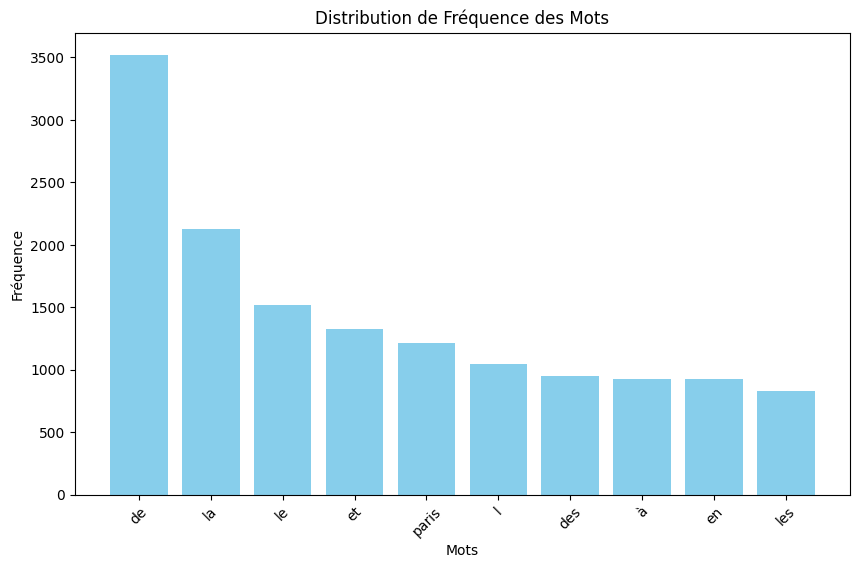

In [69]:
import matplotlib.pyplot as plt
from collections import Counter
import re

words = re.findall(r'\w+', text.lower())
word_counts = Counter(words)
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10,6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Distribution de Fréquence des Mots')
plt.xticks(rotation=45)
plt.show()


#### Étape 9 : Créer un Nuage de Mots

Générez un nuage de mots pour visualiser les mots les plus fréquents.

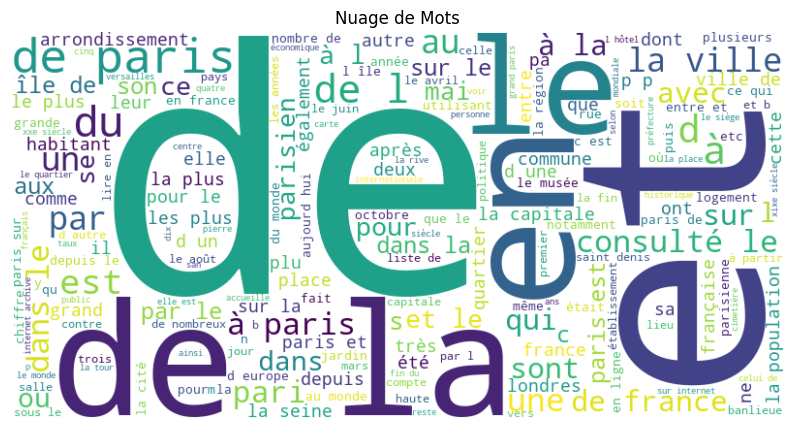

In [70]:
from wordcloud import WordCloud

words = re.findall(r'\w+', text.lower())
text_for_wordcloud = ' '.join(words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de Mots')
plt.show()


#### Étape 10 : Visualisation des Entités Nommées

Visualisez les entités nommées reconnues dans le texte à l'aide de Matplotlib.

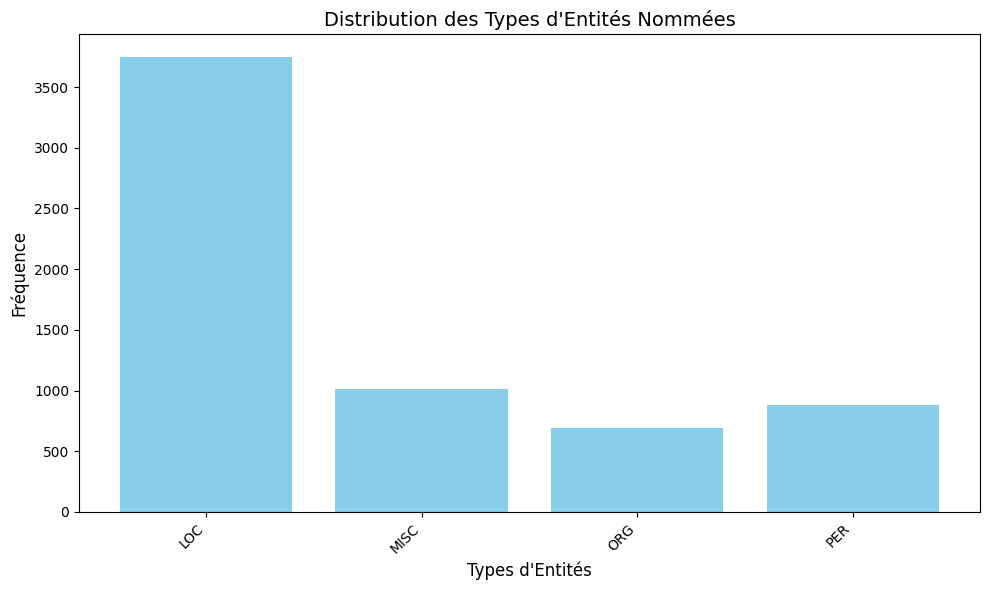

In [76]:
doc = nlp(text)

entities = [(ent.text, ent.label_) for ent in doc.ents]
entity_types = [ent.label_ for ent in doc.ents]
entity_count = Counter(entity_types)

plt.figure(figsize=(10, 6))
plt.bar(entity_count.keys(), entity_count.values(), color='skyblue')
plt.title("Distribution des Types d'Entités Nommées", fontsize=14)
plt.xlabel("Types d'Entités", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Étape 11 : Visualisation des Noms les Plus Courants

Visualisez les noms les plus courants dans le texte, ce qui peut fournir des informations sur les principaux sujets abordés.

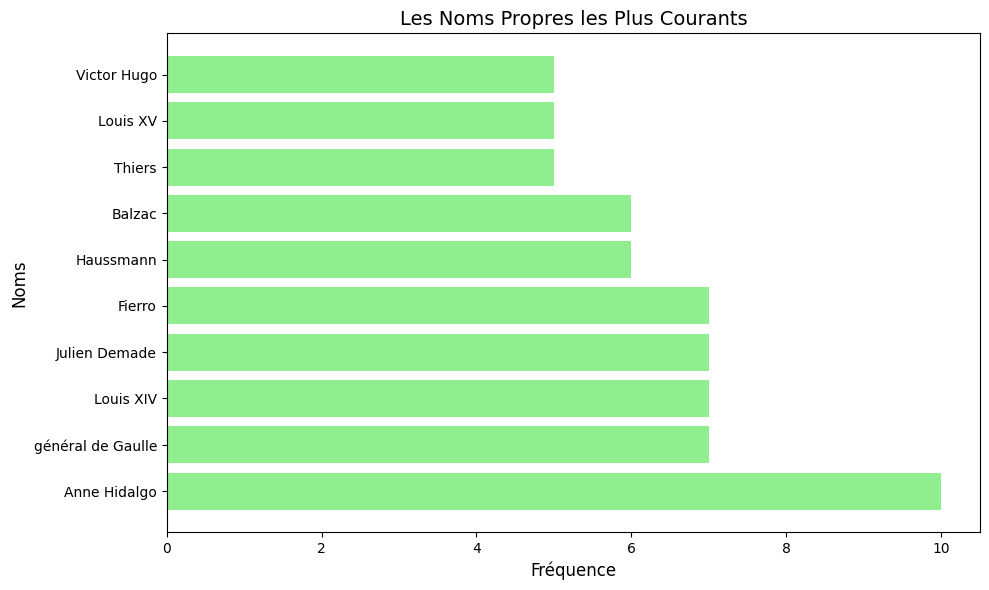

In [81]:
doc = nlp(text)

named_entities = [(ent.text, ent.label_) for ent in doc.ents]
names = [ent[0] for ent in named_entities if ent[1] == "PER"]
name_count = Counter(names)
most_common_names = name_count.most_common(10)
names, counts = zip(*most_common_names)

plt.figure(figsize=(10, 6))
plt.barh(names, counts, color='lightgreen')
plt.title("Les Noms Propres les Plus Courants", fontsize=14)
plt.xlabel("Fréquence", fontsize=12)
plt.ylabel("Noms", fontsize=12)
plt.tight_layout()
plt.show()
